# PCA in Python with Simulated Data

In [ ]:
#1. Create some data you can apply PCA to

#2. Use PCA() function  from sklearn to do PCA
#to get PCA to suggest best components to 

#3. Determine how much variation each principal component accounts for

#4. How to draw a PCA graph using matplotlib

#5. How to examine the loading scores to determine what
# variables have the largest effect on the graph


#Remember PCA is used for dimensionality reduction
# so you can extract relevant features that help cluster data so you can classify data points

#Key Steps to Remember include:

#1. Get data
#2. Draw Scree plot
#3. Develop PCA chart/plot
#4. Interpretation or classification

In [63]:
#Import relevant functions and packages

import pandas as pd
import numpy as np
import random as rd #random package used to simulate data. If you have real data, you won't need this package
from sklearn.decomposition import PCA #import PCA() function from sklearn
from sklearn import preprocessing #preprocessing gives functions for scaling data before performing PCA
import matplotlib.pyplot as plt # to draw graphs


# Step 1: Create simulated dataset

In [ ]:
#NOTE that this Example shows you how to use PCA when your original variables/ features are in ROWS
# and your observations are in COLUMNS

In [49]:
#Generate sample dataset

#Generate an array of 100 gene names (features/original variables)

genes = ['gene' + str(i) for i in range(1,101)]



In [50]:
#Creat arrays of sample names (i.e. observations)
#Create 5 "wild type" or "wt" samples and
# 5 "knock out" or "ko" samples

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
      

In [51]:
#Create Pandas dataframe to store the simulated data

data = pd.DataFrame(columns = [*wt, *ko], index = genes)
#the * unpack the "wt" and "ko" arrays - so that the column
#names are a single array 
#without the stars we would create an array of two arrays
#and not the 12 columns we want

In [ ]:
#The gene names are the equivalent of row names

#The columns (features/variables) ar the *wt and *ko



In [52]:
#Create the random data
#Lets assume the features have a Poisson distribution. This is sometimes not the case for gene data...

#For each gene in the index (i.e. gene1, gene2, ...gene100),
#we create 5 values for the "wt" samples and 5 values for the
#"ko" samples

for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5' ] = np.random.poisson(lam = rd.randrange(10,1000), size=5)

In [ ]:
#We are assuming the simulated data comes from two Poisson distributions
#means of each gene can vary between 10 and 100

In [53]:
print(data.head()) #displays the first 5 rows of data

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  461  442  447  426  445  692  599  598  588  562
gene2  142  153  173  139  172  738  733  773  736  741
gene3  609  657  604  648  630  147  148  155  159  145
gene4  866  854  803  800  859   89   91   82  108  112
gene5   56   53   76   59   55  247  282  297  298  266


In [ ]:
#You can consider gene1, gene2, gene3 ...as the features/variables
#You can consider wt1,wt...as observations

In [54]:
print(data.shape)# returns the dimensions of our data matrix

(100, 10)


In [ ]:
#So we have 100 rows and 10 columns for our simulated data
#Remember that in this example, the rows are original features and the columns are observations
#We would typically want the columns to be original features and rows be observations

# Step 2: Center and Scale Data

In [ ]:
#Step 2: Center and scale simulated data such that the features (gene1, gene2 etc) have mean = 0 and standard deviation = 1

#Before we do PCA, we have to center and scale the data

#After centering the average value for each gene will be 0
#After scaling, the standard deviation for the values of each gene will be 1


In [64]:
scaled_data = preprocessing.scale(data.T)

In [ ]:
#We pass in the transpose of our data because the scale() function
# expects the samples (columns in our data) to be rows instead of columns


#Note that you have to examine how your data is stored
#If you have observations as columns (as this Example shows), you have to transpose it before analysis

#If you have a dataset with original variables/ features as columns and observations as rows, you would use
# scaled_data = preprocessing.scale(data). You would not need to transpose the data

In [55]:
#We can also write the last line of code as below:

from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data.T)


In [65]:
#Create a PCA object

pca = PCA()

In [66]:
#Call fit method on the scaled data to do all the PCA math (i.e. calculate loading scores
# and the variation of the data each principal component accounts for)

pca.fit(scaled_data)

PCA()

In [67]:
#Generate coordinates for a PCA graph based on the loading scores and
# the scaled data

#pca.transform() creates the coordinates for the points on the PCA plot

pca_data = pca.transform(scaled_data)

# Step 3: Generate Scree Plot

In [59]:
#Draw a Scree Plot - to see how many principal components
# should go into the final plot



In [68]:
#First, we calculate the percentage of variation that each principal 
# component accounts for

per_var= np.round(pca.explained_variance_ratio_*100, decimals = 1)

In [69]:
#Create labels for the Scree Plot. 
#These are "PC1", "PC2" etc (one label per principal component)

labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

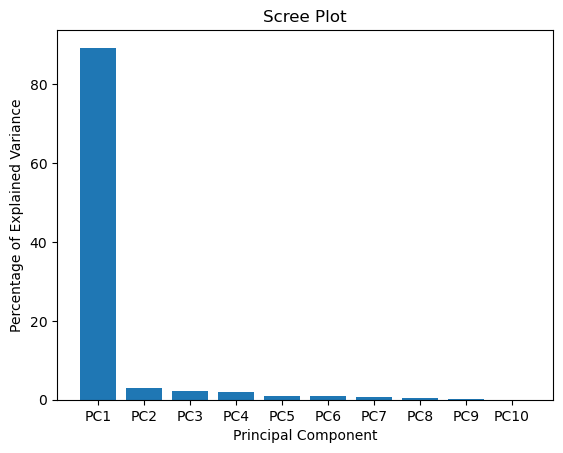

In [70]:
#Use matplotlib to create a bar plot

plt.bar(x=range(1,len(per_var)+1), height = per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
#We see that almost all of the variation (in the original data)
# is along the first PC, so a 2-D graph, using PC1 and PC2
# should do a good job representing the original data

# Step 4: Draw a PCA Plot

In [ ]:
#Put the new coordinates, created by pca.transform(scaled.data)
#into a matrix where the rows have feature/sample labels and the columns have principal components (PC) labels

In [71]:


pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

In [72]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.441448,1.276285,1.966036,-0.684507,-0.896569,-0.310531,-0.302483,-0.634466,1.073004,2.928213e-15
wt2,-9.497603,-2.191329,-1.458429,0.501043,1.154208,-0.671027,-1.374074,-0.661907,-0.093724,1.977585e-15
wt3,-9.244060,4.116804,-0.479725,0.138599,0.549893,0.194683,-0.231197,0.297181,-0.713450,-1.387779e-16
wt4,-9.405356,-1.005580,-0.742419,1.424632,0.415537,-0.409914,1.384692,1.085988,0.536093,1.804112e-15
wt5,-9.615678,-2.130780,0.763280,-1.218892,-1.265180,1.149156,0.511649,-0.087057,-0.821737,1.929013e-15
ko1,9.431308,0.390176,-2.262358,-1.360014,-1.339914,-1.681119,0.305923,-0.078162,-0.113982,-2.053913e-15
ko2,8.929192,-0.459109,0.367703,-2.361517,0.906129,0.751826,-0.823576,1.083794,0.343798,1.304512e-15
ko3,9.279045,0.503878,-1.809537,0.860360,0.160272,1.894493,0.518628,-0.863394,0.404473,-1.457168e-15
ko4,10.055206,-0.276785,1.312090,2.762024,-1.134379,-0.041129,-0.995116,0.492279,-0.217469,8.500145e-16
ko5,9.509394,-0.223559,2.343360,-0.061729,1.450002,-0.876438,1.005555,-0.634256,-0.397007,-2.997602e-15


In [ ]:
#Note that, because we transposed our data, we now have the correct setup in rows and columns

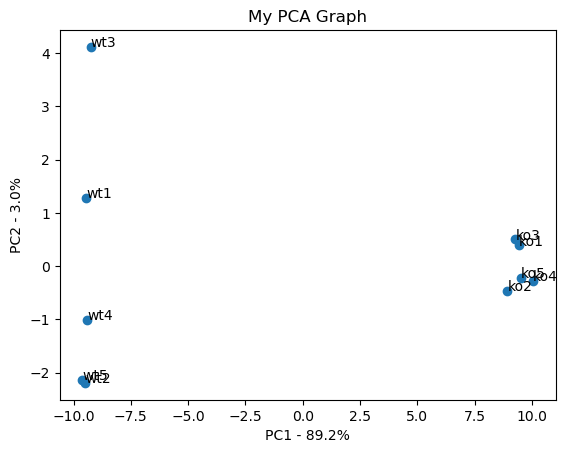

In [73]:
#Draw scatter plot with a title and axis labels for pca_df data

plt.scatter(pca_df.PC1, pca_df.PC2) #PC1 and PC2 are selected since we agreed they explain most variation in the data
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#add text to (i.e. annotate) the scatter points

# the loop below annotates the (points) on the PCA graph

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()#displays the PCA graph

In [ ]:
#NOTE the following insights:

#1. The ko features cluster in the left hand corner - meaning they correlate with each other

#2. The wt features cluster in the right hand corner - meaning they correlate with each other

#3. The gap/separation of the two clusters along the x-axis/ PC1 - axis suggests that the ko features are
# very different from the wt features


# Step 4.1: Examine Loading Scores

In [ ]:
#Lastly lets look at the loading scores for PC1 to determine which original variables/features (i.e. genes)
# had the largest influence on separating the two clusters along the x-axis


In [ ]:
#First, create a Pandas "Series" object with the loading scores in PC1
#Note that the principal components are zero-indexed, so PC1 = 0

loading_scores = pd.Series(pca.components_[0], index=genes)

In [ ]:
#Second, we sort the loading scores based on their magnitude (absolute values)

sorted_loading_scores = loading_scores.abs().sort_values(ascending =False)

In [ ]:
#Third, retrieve the names of the top 10 indexes/rows/gene names

top_10_genes = sorted_loading_scores[0:10].index.values

In [ ]:
#lastly, print the top gene names and their corresponding
# loading scores

print(loading_scores[top_10_genes])

In [ ]:
# We see that the values above are super similar, so a lot of genes played 
# a role in separating the features/samples/rather than just one or two

# PCA with non-Simulated Data

# Application 1: Using PCA for Data Vizualization (of the Iris Dataset)

In [ ]:
#For many ML applications, it always helps to visualize 
# your data

#Visualizing 2 or 3 dimensional data is not challenging but visualizing 4 or more dimensional data at once is impossible

#The Iris dataset used here has 4 features (or is 4-dimensional)
#You can use PCA to reduce that 4-dimensional data into 2 or 3 dimensions
# so you can plot and hopefully understand the data better

In [74]:
#Load Iris dataset

import pandas as pd

import matplotlib as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" #Obtaining data from the UCI ML Repository

#load dataset into Pandas DataFrame

df = pd.read_csv(url, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])


In [75]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Notice the data is 4-dimensional: there are 4 features and 1 target variable

#2-dimensional data can be visualized at once with a scatterplot.

#Its hard to visualize 4-dimensional data. So we use PCA to 
#reduce our 4-dimensional data into 2-dimensions so we can
#plot and use our data in other ML algorithms

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

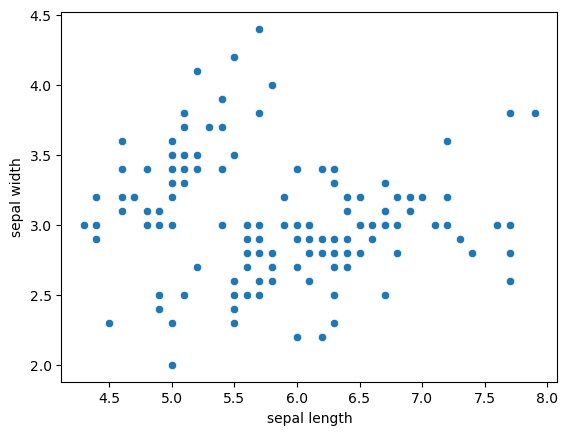

In [76]:
#How to visualize 2-Dimensional data at once using a scatterplot in Python (using Seaborn)

import seaborn as sns

sns.scatterplot(x = 'sepal length', y='sepal width', data = df)

In [ ]:
#Step 1: import packages and isolate required features from dataset

from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [ ]:
#Separating out the features

x = df.loc[:, features].values

In [ ]:
#Separating out the target

y = df.loc[:, 'target'].values

In [ ]:
#Step 2: Standardize/scale the values in each feature
#Using StandardScaler() to standardize the values produces features
# with mean = 0 and variance = 1, which helps optimal performance of 
#many ML algorithms

In [ ]:
#Standardize the features

#Note that it is customary to standardize the features and not the target

x=StandardScaler().fit_transform(x)

In [ ]:
#Step 3: Do a PCA Projection from 4D to 2D

#The code below projects the original data from 4-dimensions to 2-dimensions

In [ ]:
from sklearn.decomposition import PCA

#n_components = 2 specifies that you want to project to 2 -dimensions
# i.e. you want to keep the top 2 principal components

pca = PCA(n_components = 2)

In [ ]:
#Fit and transform on x to extract principal components (PC1 and PC2)

principalComponents = pca.fit_transform(x)

In [ ]:
#Place principal components in a data frame

principalDf = pd.DataFrame(data = principalComponents,
                        columns = ['principal component 1', 'principal component 2'])

In [ ]:
#Concatenate principal components with target variable

finalDf = pd.concat([principalDf, df['target']], axis = 1)

In [ ]:
finalDf

In [ ]:
#Step 4: Visualize 2D Projection of original 4D data

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'principal component 1', y = 'principal component 2', data = finalDf, hue = 'target')

# Application 2: Using PCA to Speed Up an ML Algorithm

# PCA + Logistic Regression using MNIST Dataset

In [ ]:
#One very important applications of PCA is for speeding up
#ML algorithms

#While you can speed up the fitting of a ML algorithm by changing the
# optimization algorithm, PCA has become very popular for this goal

#If your ML algorithm is too slow because the input dimension is too high
#then using PCA to speed it up can be a resonable choice

#Ingest data - > scale data - > apply PCA - > fit ML model by applying ML algorithm to PCA-transformed data

#The MINST dataset is a large one that allows us demonstrate
#how PCA can help speed up an ML algorithm (in this case Logistic Regression)

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split



mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']
digit = x[36001]

In [ ]:
#Display the dimensions of the MNIST dataset

mnist.data.shape

In [ ]:
#MNIST has 70,000 observations and 784 features/columns
# It also has a training set 60,000 examples and a test set of 10,000
#examples

#Can you plot 784 features all at once like you would 2 features at once?

#The features are images and the target values are labels

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state = 0)

In [ ]:
print(train_img.shape)

In [ ]:
print(test_img.shape)

In [ ]:
#Standardize the data

#You can standardise the data to have mean = 0 and variance = 1
#This is a requirement for the optimal performance of many ML algorithms

#StandardScaler (from sklearn.preprocessing) helps standardize the dataset features

#Note that you fit on the training set and transform on the training and test set





In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#Fit on training set only
scaler.fit(train_img)

In [ ]:
#Apply transform to both the training set and the test set

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
#Import and Apply PCA

#Notice the code below has .95 for the number of components parameter
#It means that scikit-learn will choose the minimum number
# of principal components such that 95% of the variance is retained



In [ ]:
from sklearn.decomposition import PCA

#make an instance of PCA

pca = PCA(.95)

In [ ]:
#Fit PCA on training set
#NOTE: You are fitting PCA on the training set only

#Here you tell sklearn to choose the minimum number of
#components such that 95% of the variance in the data is retained

pca.fit(train_img)

In [ ]:
#Retained variance is a criteria that can be used to choose the appropriate number of principle components. 
#The higher the value, the better the performance

#It represents how much of the information was retained after PCA. The higher the value, the more information retained

#Some criteria say that the total variance explained by all components should be between 70% to 80% variance

In [ ]:
#Check what the minimum is currently

pca.n_components_

In [ ]:
#Apply mapping (transform) to both the training set and
# test set

train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
#Apply Logistic Regression to the Transformed MNIST Data

In [ ]:
#Step 1: Import the model you want to use

from sklearn.linear_model import LogisticRegression

In [ ]:
#Step 2: Make an instance of the Model

#all parameters not specified are set to their defaults
LogisticRegr = LogisticRegression(solver = 'lbfgs')



In [ ]:
#Step 3: Train the model on the data storing the information learned from the data

#Model learns the relationship between x(digits) and y (labels)

LogisticRegr.fit(train_img, train_lbl)

In [ ]:
#Step 4: Predict the labels of new data (new images)

#Predict labels for one image (returns a NumPy array)

LogisticRegr.predict(test_img[0].reshape(1,-1))


In [ ]:
#Step 4 (continued): Predict the labels for several images

LogisticRegr.predict(test_img[0:10])

In [ ]:
#Step 5: Measure Model Performance

#While accuracy is not always the best metric for ML algorithms
#(precision, recall, F1 Score etc would be better), we use accuracy for simplicity

LogisticRegr.score(test_img, test_lbl)